<a href="https://colab.research.google.com/github/atanasvasilevjourney/Data/blob/master/FinancialStatements_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Create API Token from Kaggle and Upload json file


In [2]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nastadata","key":"9d6ae17893b37f31ce6ae58edf56c181"}'}

Setup Kaggle API Receiver

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Access the dataset and download it from Kaggle through API

In [4]:
!kaggle datasets download -d ziya07/accounting-data-for-financial-management


Dataset URL: https://www.kaggle.com/datasets/ziya07/accounting-data-for-financial-management
License(s): CC0-1.0


Unzip and unarchive the dataset


In [10]:
!unzip accounting-data-for-financial-management.zip

import pandas as pd
df = pd.read_csv("Accounting Data for Financial Management.csv")  # Replace with actual file name





Archive:  accounting-data-for-financial-management.zip
replace accounting_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

FileNotFoundError: [Errno 2] No such file or directory: 'Accounting Data for Financial Management.csv'

Locate the directory and file name

In [11]:
!unzip -o accounting-data-for-financial-management.zip
!ls

Archive:  accounting-data-for-financial-management.zip
  inflating: accounting_data.csv     
accounting_data_1    accounting-data-for-financial-management.zip  kaggle.json
accounting_data.csv  drive					   sample_data


Import Pandas library and show the dataset

In [13]:
import pandas as pd

df = pd.read_csv("accounting_data.csv")  # Replace with actual file name
df.head()

,Transaction ID,Date,Account Type,Transaction Amount,Cash Flow,Net Income,Revenue,Expenditure,Profit Margin,Debt-to-Equity Ratio,Operating Expenses,Gross Profit,Transaction Volume,Processing Time (seconds),Accuracy Score,Missing Data Indicator,Normalized Transaction Amount,Transaction Outcome
0,1,2025-01-01,Asset,1176,3184,2174,3137,1823,0.607221,2.067004,4098,2327,8,1.894686,0.959936,False,0.218724,1
1,2,2025-01-02,Asset,1291,3221,3236,4694,2746,0.355608,2.347537,3872,388,5,1.728990,0.966382,False,0.242232,1
2,3,2025-01-03,Revenue,4966,3309,3689,3363,3102,0.678347,1.901003,4780,2616,2,1.707099,0.828307,False,0.993459,1
3,4,2025-01-04,Expense,4641,1952,245,4373,808,0.221047,0.934125,4948,2237,8,1.750641,0.984149,False,0.927024,1
4,5,2025-01-05,Expense,2305,2131,2037,4956,644,0.509323,1.061178,3289,1729,3,0.879708,0.929107,False,0.449509,1


In [17]:
df.tail()

,Transaction ID,Date,Account Type,Transaction Amount,Cash Flow,Net Income,Revenue,Expenditure,Profit Margin,Debt-to-Equity Ratio,Operating Expenses,Gross Profit,Transaction Volume,Processing Time (seconds),Accuracy Score,Missing Data Indicator,Normalized Transaction Amount,Transaction Outcome
995,996,2027-09-23,Asset,2625,2655,2152,3480,3974,0.575794,1.225116,2240,1176,6,0.571376,0.864797,False,0.514922,0
996,997,2027-09-24,Asset,676,1586,472,3363,1952,0.406426,1.742689,3317,1268,5,1.535432,0.985745,False,0.116517,1
997,998,2027-09-25,Revenue,2758,3624,2787,2702,3778,0.585813,2.290615,2494,2574,8,1.423379,0.893314,False,0.542110,1
998,999,2027-09-26,Liability,796,2063,3203,3855,1266,0.248271,2.229671,4277,1354,9,1.166093,0.849563,False,0.141047,1
999,1000,2027-09-27,Expense,3387,4041,2545,4521,831,0.409078,2.353535,1658,3848,3,1.696704,0.820586,False,0.670687,1


EDA of Accounting data get 2 know

In [16]:
df.shape

(1000, 18)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Transaction ID                 1000 non-null   int64  
 1   Date                           1000 non-null   object 
 2   Account Type                   1000 non-null   object 
 3   Transaction Amount             1000 non-null   int64  
 4   Cash Flow                      1000 non-null   int64  
 5   Net Income                     1000 non-null   int64  
 6   Revenue                        1000 non-null   int64  
 7   Expenditure                    1000 non-null   int64  
 8   Profit Margin                  1000 non-null   float64
 9   Debt-to-Equity Ratio           1000 non-null   float64
 10  Operating Expenses             1000 non-null   int64  
 11  Gross Profit                   1000 non-null   int64  
 12  Transaction Volume             1000 non-null   in

Conclusions on the dataset:


1. Non-missing values in the dataset
2.   2 Columns Dtype='object' - date - string, which need to be transform to datetime !!, account type =  categorical value
3. 5 float Dtype - decimal values for precision
4. 10 int Dtype - numerical values
5. 1 boolean value



Convert Date from String to Datetime

In [19]:
df['Date'] = pd.to_datetime(df['Date'])
print(df['Date'])
print(df['Date'].dtype)

0     2025-01-01
1     2025-01-02
2     2025-01-03
3     2025-01-04
4     2025-01-05
         ...    
995   2027-09-23
996   2027-09-24
997   2027-09-25
998   2027-09-26
999   2027-09-27
Name: Date, Length: 1000, dtype: datetime64[ns]
datetime64[ns]


Get the unique values and their counts in Accounting Type

In [20]:
account_type_counts= df['Account Type'].value_counts()
print(account_type_counts)

Account Type
Expense      257
Asset        255
Liability    250
Revenue      238
Name: count, dtype: int64


Visualization of distribution of Accounting type

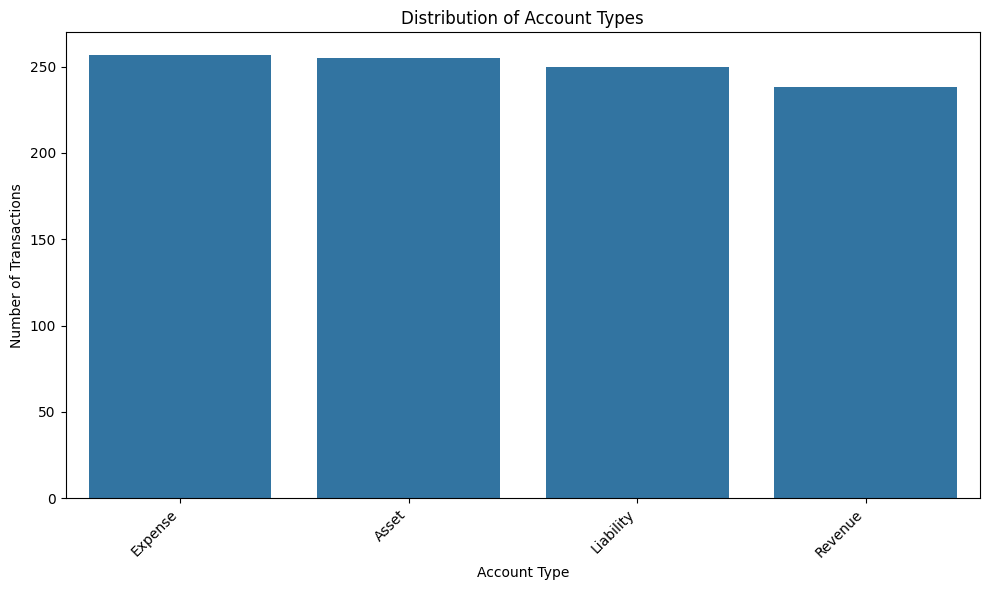

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=account_type_counts.index, y=account_type_counts.values)
plt.title('Distribution of Account Types')
plt.xlabel('Account Type')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The distribution is almost simillar, as accounting balance standard, only the counts of different type

Visualizing the distributions of all numerical columns using histograms and boxplots.

In [41]:
#indentify numerical columns

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_columns)

Index(['Transaction ID', 'Transaction Amount', 'Cash Flow', 'Net Income',
       'Revenue', 'Expenditure', 'Profit Margin', 'Debt-to-Equity Ratio',
       'Operating Expenses', 'Gross Profit', 'Transaction Volume',
       'Processing Time (seconds)', 'Accuracy Score',
       'Normalized Transaction Amount', 'Transaction Outcome'],
      dtype='object')


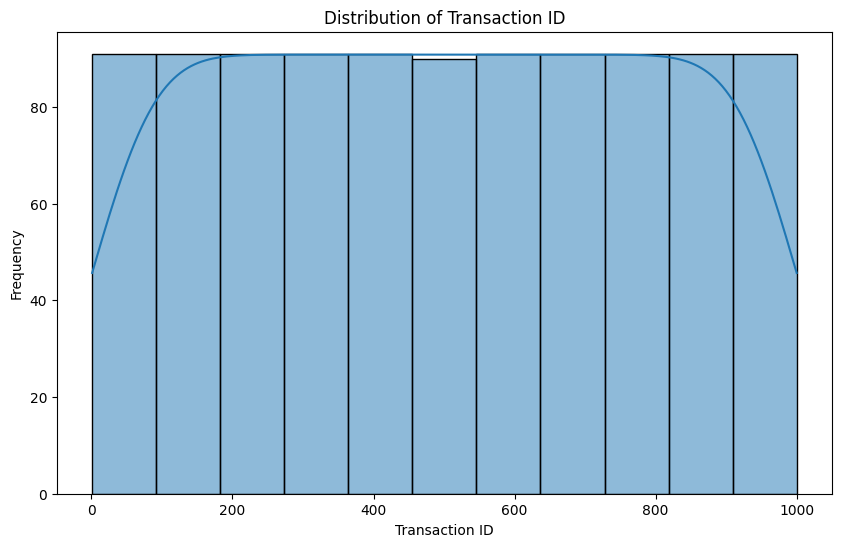

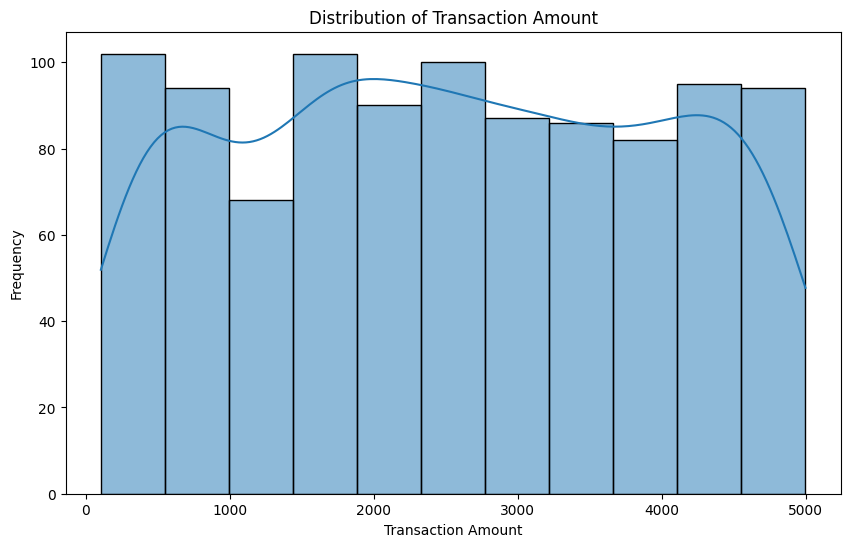

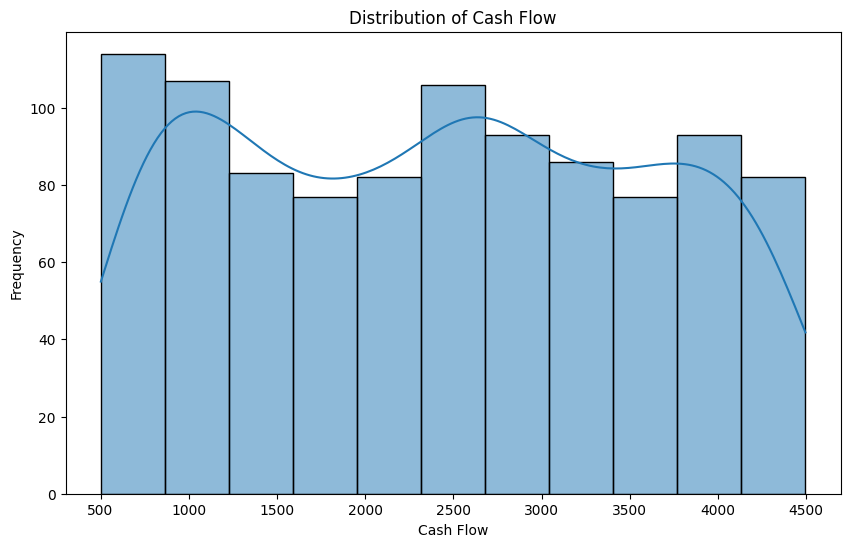

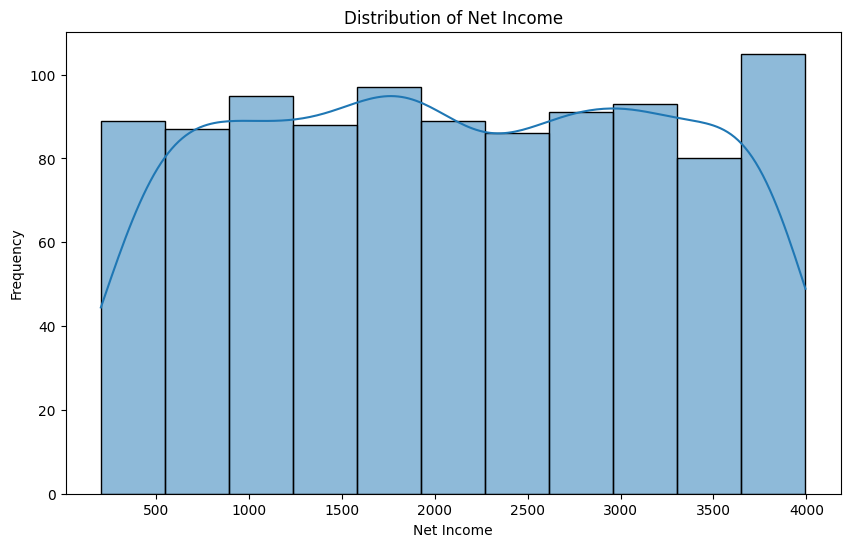

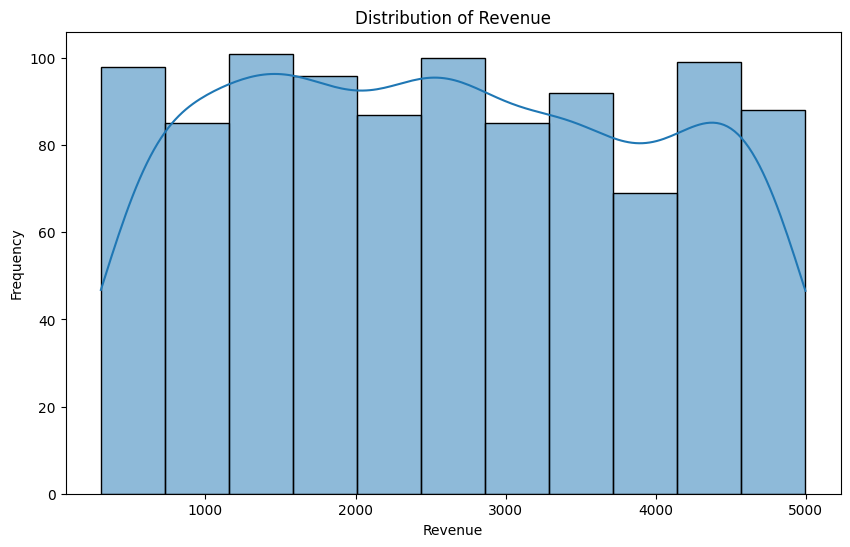

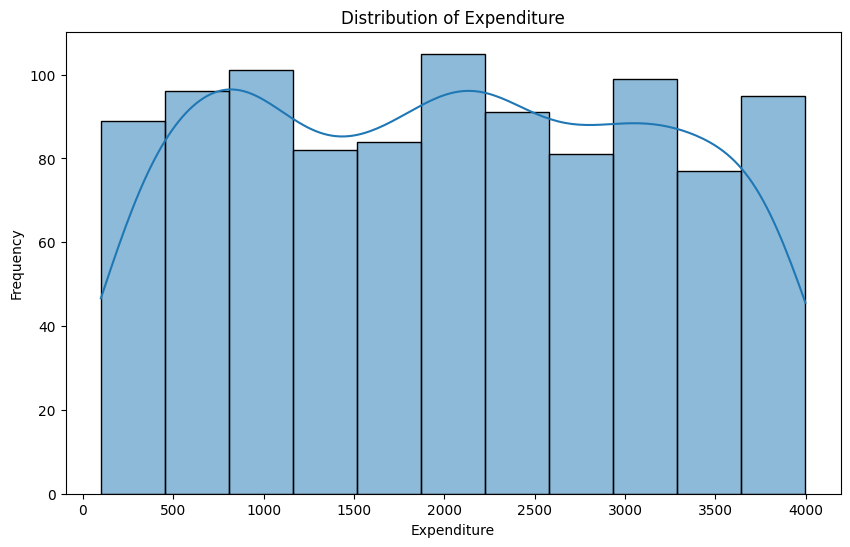

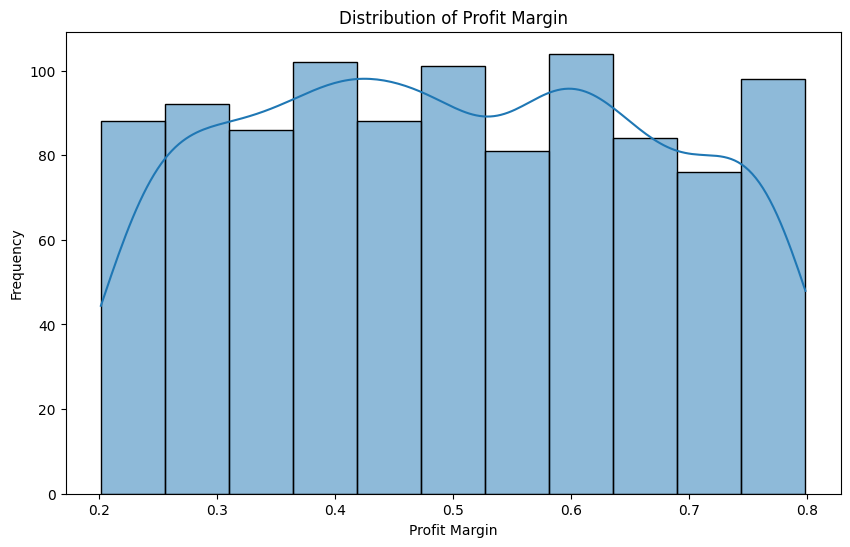

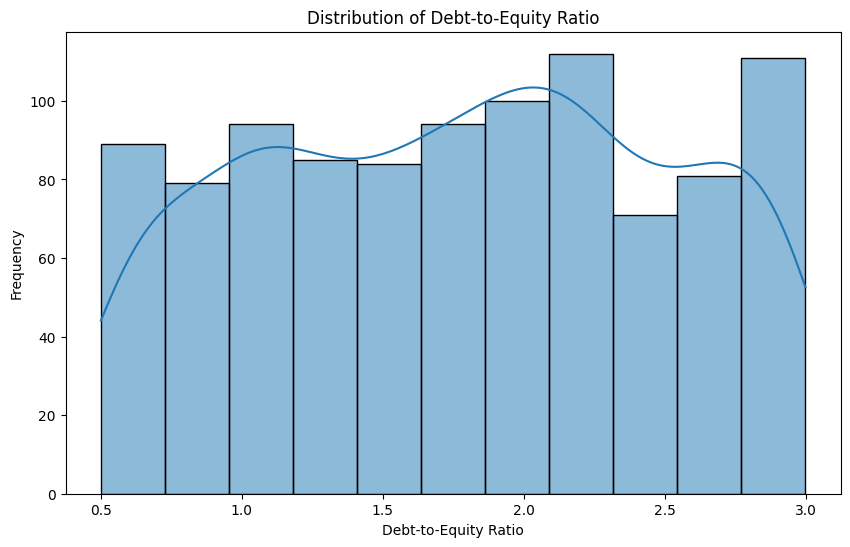

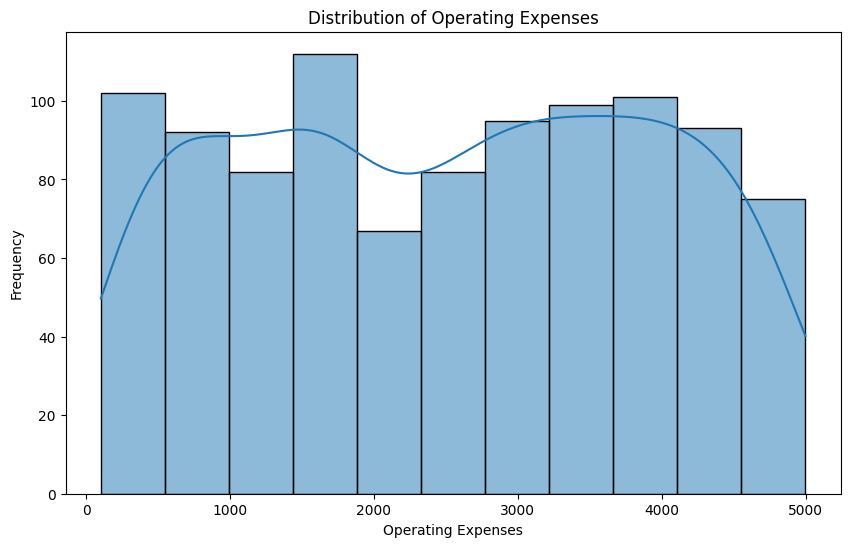

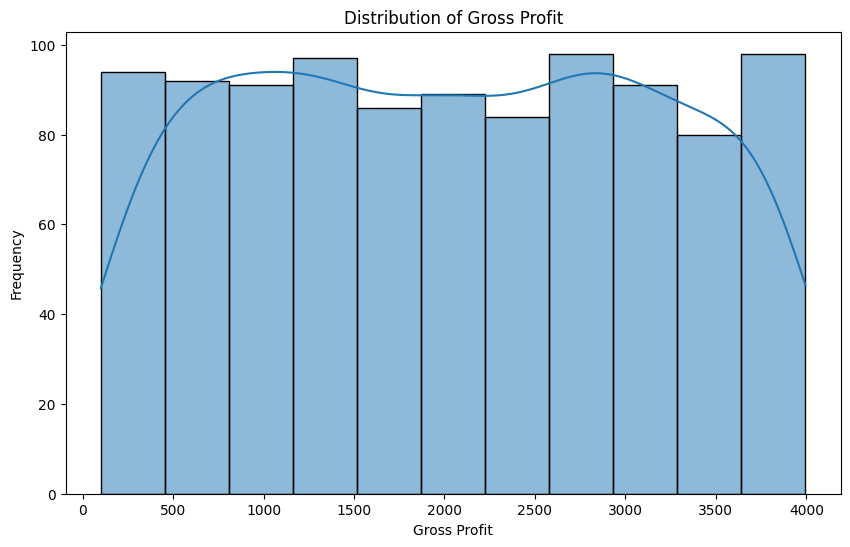

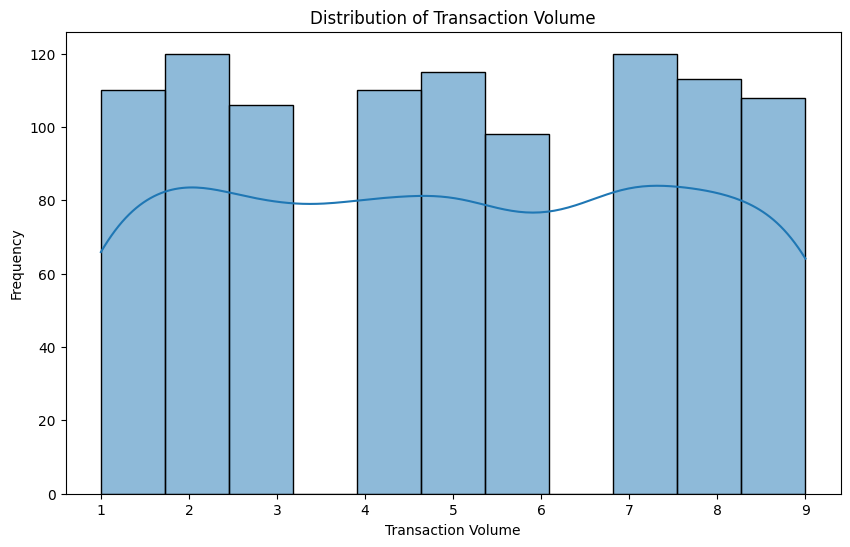

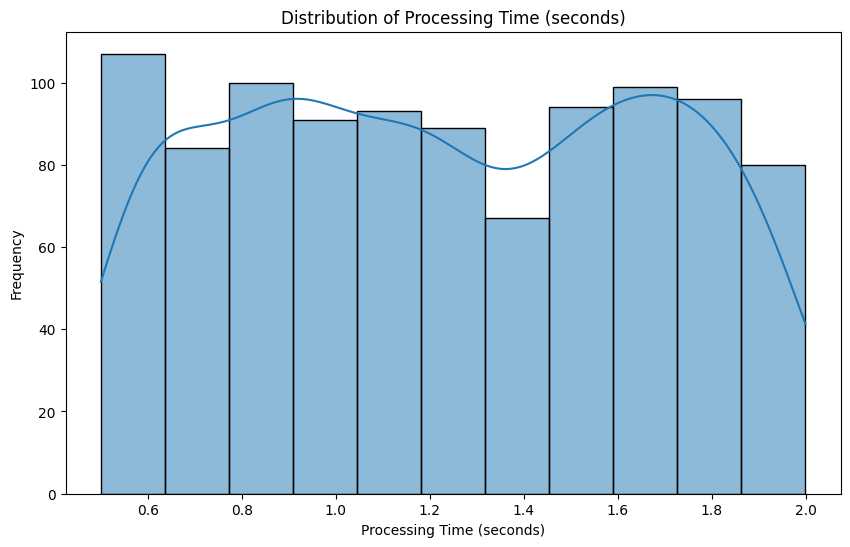

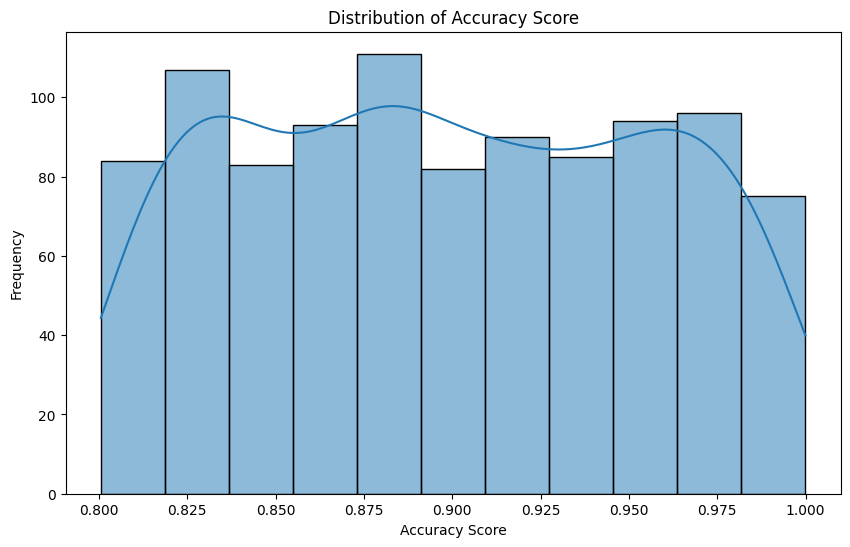

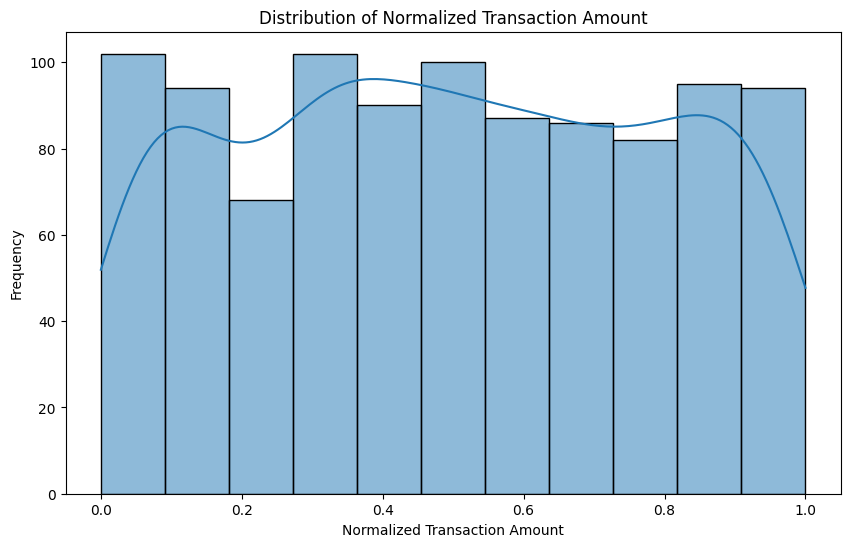

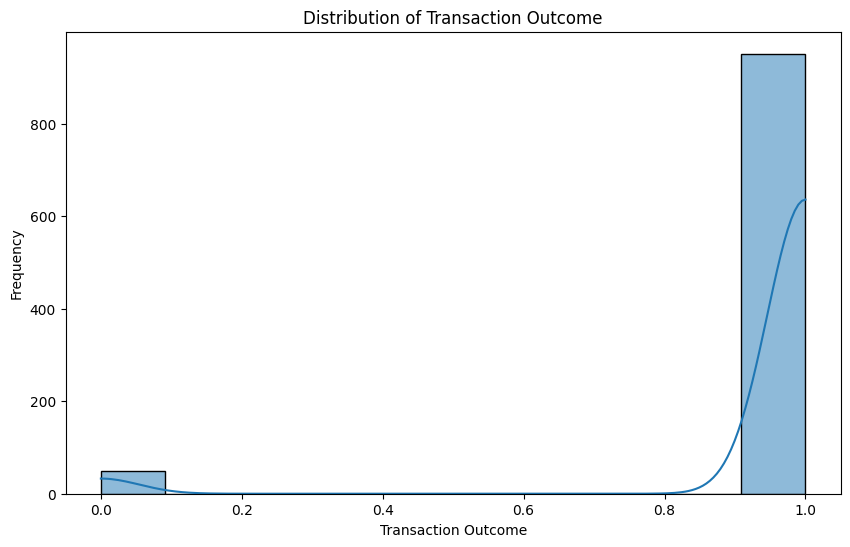

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

for i in numerical_columns:
  plt.figure(figsize=(10, 6))
  sns.histplot(df[i], kde=True)
  plt.title(f'Distribution of {i}')
  plt.xlabel(i)
  plt.ylabel('Frequency')
  plt.show()



Calculating and visualizing the correlation matrix of the numerical columns

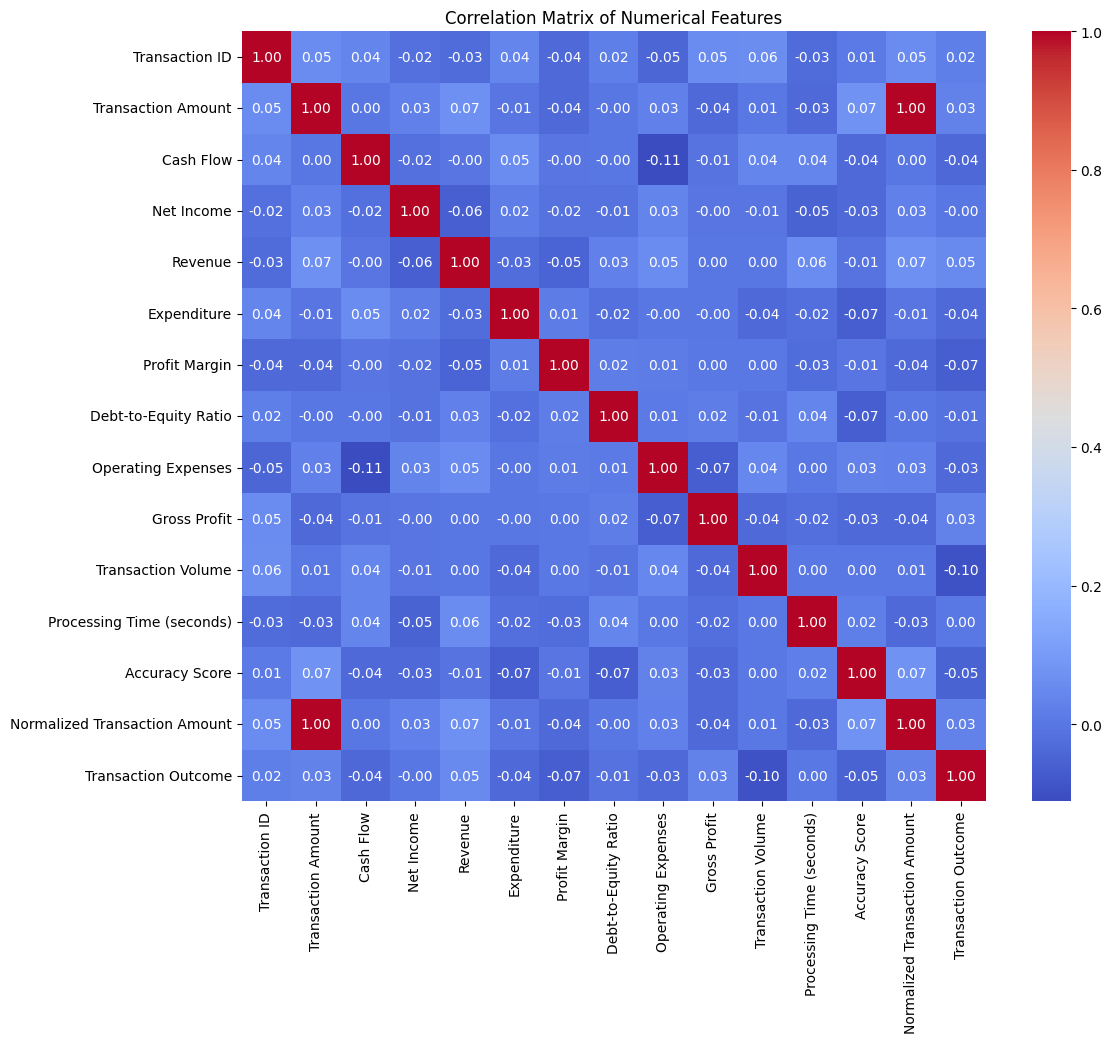

In [52]:
correlation_matrix=df[numerical_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

We can see from the correlation matrix, there are not significat of correlation between numerical columns. Only Normalized Transaction Amount which is equal Transactional Amount.

Exploring the relationship between 'Account Type' and numerical columns using boxplots.